In [2]:
import numpy as np # 数学计算
import pandas as pd # 数据处理, 读取 CSV 文件 (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from datetime import datetime as dt


In [3]:
# 你可以使用如下的方法下载某一个公司的股票交易历史
# 000001 为平安银行
# 如果你还没有安装, 可以使用 pip install tushare 安装tushare python包
#import tushare as ts
#df = ts.get_hist_data('000001')
#print(df)
#df.to_csv('000001.csv')


In [4]:
df = pd.read_csv('./000001.csv') 

In [5]:
print(np.shape(df))
df.head()

(611, 14)


date   open   high  close    low      volume  price_change  p_change  \
0  2019-05-30  12.32  12.38  12.22  12.11   646284.62         -0.18     -1.45   
1  2019-05-29  12.36  12.59  12.40  12.26   666411.50         -0.09     -0.72   
2  2019-05-28  12.31  12.55  12.49  12.26   880703.12          0.12      0.97   
3  2019-05-27  12.21  12.42  12.37  11.93  1048426.00          0.02      0.16   
4  2019-05-24  12.35  12.45  12.35  12.31   495526.19          0.06      0.49   

      ma5    ma10    ma20      v_ma5     v_ma10      v_ma20  
0  12.366  12.390  12.579  747470.29  739308.42   953969.39  
1  12.380  12.453  12.673  751584.45  738170.10   973189.95  
2  12.380  12.505  12.742  719548.29  781927.80   990340.43  
3  12.394  12.505  12.824  689649.77  812117.30  1001879.10  
4  12.396  12.498  12.928  637251.61  781466.47  1046943.98

股票数据的特征

* date：日期
* open：开盘价
* high：最高价
* close：收盘价
* low：最低价
* volume：成交量
* price_change：价格变动
* p_change：涨跌幅
* ma5：5日均价
* ma10：10日均价
* ma20:20日均价
* v_ma5:5日均量
* v_ma10:10日均量
* v_ma20:20日均量

In [6]:
# 将每一个数据的键值的类型从字符串转为日期

df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
# 按照时间升序排列
df.sort_values(by=['date'], inplace=True, ascending=True)
df.tail()

open   high  close    low      volume  price_change  p_change  \
date                                                                         
2019-05-24  12.35  12.45  12.35  12.31   495526.19          0.06      0.49   
2019-05-27  12.21  12.42  12.37  11.93  1048426.00          0.02      0.16   
2019-05-28  12.31  12.55  12.49  12.26   880703.12          0.12      0.97   
2019-05-29  12.36  12.59  12.40  12.26   666411.50         -0.09     -0.72   
2019-05-30  12.32  12.38  12.22  12.11   646284.62         -0.18     -1.45   

               ma5    ma10    ma20      v_ma5     v_ma10      v_ma20  
date                                                                  
2019-05-24  12.396  12.498  12.928  637251.61  781466.47  1046943.98  
2019-05-27  12.394  12.505  12.824  689649.77  812117.30  1001879.10  
2019-05-28  12.380  12.505  12.742  719548.29  781927.80   990340.43  
2019-05-29  12.380  12.453  12.673  751584.45  738170.10   973189.95  
2019-05-30  12.366  12.390  12.579  747470.29  739308.42   953969.39

In [7]:
# 检测是否有缺失数据 NaNs

df.dropna(axis=0 , inplace=True)
df.isna().sum()

open            0
high            0
close           0
low             0
volume          0
price_change    0
p_change        0
ma5             0
ma10            0
ma20            0
v_ma5           0
v_ma10          0
v_ma20          0
dtype: int64

### K线图

In [8]:
Min_date = df.index.min()
Max_date = df.index.max()
print ("First date is",Min_date)
print ("Last date is",Max_date)
print (Max_date - Min_date)

First date is 2016-11-29 00:00:00
Last date is 2019-05-30 00:00:00
912 days 00:00:00


In [9]:
from plotly import tools
from plotly.graph_objs import *
from plotly.offline import init_notebook_mode, iplot, iplot_mpl
init_notebook_mode()
import plotly.plotly as py
import plotly.graph_objs as go

trace = go.Ohlc(x=df.index, open=df['open'], high=df['high'], low=df['low'], close=df['close'])
data = [trace]
iplot(data, filename='simple_ohlc')

### 线性回归

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing


In [11]:
# 创建新的列, 包含预测值, 根据当前的数据预测5天以后的收盘价
num = 5 # 预测5天后的情况
df['label'] = df['close'].shift(-num) # 预测值
                                     
print(df.shape)

(611, 14)


In [12]:
# 丢弃 'label', 'price_change', 'p_change', 不需要它们做预测
Data = df.drop(['label', 'price_change', 'p_change'],axis=1)
Data.tail()

open   high  close    low      volume     ma5    ma10    ma20  \
date                                                                         
2019-05-24  12.35  12.45  12.35  12.31   495526.19  12.396  12.498  12.928   
2019-05-27  12.21  12.42  12.37  11.93  1048426.00  12.394  12.505  12.824   
2019-05-28  12.31  12.55  12.49  12.26   880703.12  12.380  12.505  12.742   
2019-05-29  12.36  12.59  12.40  12.26   666411.50  12.380  12.453  12.673   
2019-05-30  12.32  12.38  12.22  12.11   646284.62  12.366  12.390  12.579   

                v_ma5     v_ma10      v_ma20  
date                                          
2019-05-24  637251.61  781466.47  1046943.98  
2019-05-27  689649.77  812117.30  1001879.10  
2019-05-28  719548.29  781927.80   990340.43  
2019-05-29  751584.45  738170.10   973189.95  
2019-05-30  747470.29  739308.42   953969.39

In [13]:
X = Data.values
X = preprocessing.scale(X)
X = X[:-num]

df.dropna(inplace=True)
Target = df.label
y = Target.values

print(np.shape(X), np.shape(y))

(606, 11) (606,)


In [14]:
# 将数据分为训练数据和测试数据
X_train, y_train = X[0:550, :], y[0:550]
X_test, y_test = X[550:, -51:], y[550:606]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(550, 11)
(550,)
(56, 11)
(56,)


In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test) # 使用绝对系数 R^2 评估模型

0.04930040648385525

In [16]:
# 做预测 

X_Predict = X[-num:]
Forecast = lr.predict(X_Predict)
print(Forecast)
print(y[-num:])
print(X_Predict)

[12.5019651  12.45069629 12.56248765 12.3172638  12.27070154]
[12.35 12.37 12.49 12.4  12.22]
[[ 1.33981111  1.19832101  1.02012019  1.10423258 -0.09374448  1.13748585
   1.1738002   1.73046344 -0.1920154   0.27170906  0.26317999]
 [ 0.97813252  0.96110571  0.98222502  1.03191402 -0.38046451  1.14768664
   1.14222724  1.66534722 -0.17460951 -0.00658067  0.23823498]
 [ 1.00985871  1.07667214  1.09591053  1.10423258 -0.46913789  1.15661234
   1.11709775  1.60680839 -0.35109762 -0.07844506  0.26392379]
 [ 1.11772776  0.97935304  0.99485674  1.07793492 -0.83038427  1.09030716
   1.10421083  1.5305106  -0.58481498 -0.17720161  0.17914381]
 [ 0.9083349   0.88811639  0.92538227  0.95959547 -0.57247177  1.01890159
   1.11258733  1.46934081 -0.57232128 -0.36458186  0.10403438]]


### 画预测结果

In [17]:
# 预测 2019-05-13 到 2019-05-17 , 一共 5 天的收盘价 
trange = pd.date_range('2019-05-13', periods=num, freq='d')
trange

DatetimeIndex(['2019-05-13', '2019-05-14', '2019-05-15', '2019-05-16',
               '2019-05-17'],
              dtype='datetime64[ns]', freq='D')

In [18]:
# 产生预测值dataframe
Predict_df = pd.DataFrame(Forecast, index=trange)
Predict_df.columns = ['forecast']
Predict_df

forecast
2019-05-13  12.501965
2019-05-14  12.450696
2019-05-15  12.562488
2019-05-16  12.317264
2019-05-17  12.270702

In [19]:
# 将预测值添加到原始dataframe
df = pd.read_csv('./000001.csv') 
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
# 按照时间升序排列
df.sort_values(by=['date'], inplace=True, ascending=True)
df_concat = pd.concat([df, Predict_df], axis=1)

df_concat = df_concat[df_concat.index.isin(Predict_df.index)]
df_concat.tail(num)

open   high  close    low      volume  price_change  p_change  \
2019-05-13  12.33  12.54  12.30  12.23   741917.75         -0.38     -3.00   
2019-05-14  12.20  12.75  12.49  12.16  1182598.12          0.19      1.54   
2019-05-15  12.58  13.11  12.92  12.57  1103988.50          0.43      3.44   
2019-05-16  12.93  12.99  12.85  12.78   634901.44         -0.07     -0.54   
2019-05-17  12.92  12.93  12.44  12.36   965000.88         -0.41     -3.19   

               ma5    ma10    ma20       v_ma5      v_ma10      v_ma20  \
2019-05-13  12.538  13.143  13.637  1107915.51  1191640.89  1211461.61   
2019-05-14  12.446  12.979  13.585  1129903.46  1198753.07  1237823.69   
2019-05-15  12.510  12.892  13.560  1155611.00  1208209.79  1254306.88   
2019-05-16  12.648  12.767  13.518   971160.96  1168630.36  1209357.42   
2019-05-17  12.600  12.626  13.411   925681.34  1153473.43  1138638.70   

             forecast  
2019-05-13  12.501965  
2019-05-14  12.450696  
2019-05-15  12.562488  
2019-05-16  12.317264  
2019-05-17  12.270702

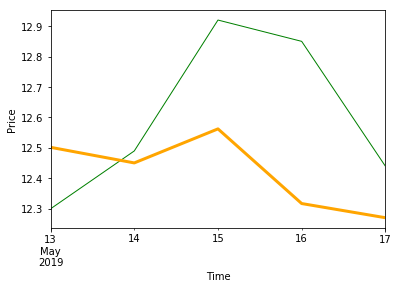

In [20]:
# 画预测值和实际值

df_concat['close'].plot(color='green', linewidth=1)
df_concat['forecast'].plot(color='orange', linewidth=3)
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [21]:
# 理解模型
for idx, col_name in enumerate(['open', 'high', 'close', 'low', 'volume', 'ma5', 'ma10', 'ma20', 'v_ma5', 'v_ma10', 'v_ma20']):
    print("The coefficient for {} is {}".format(col_name, lr.coef_[idx]))

The coefficient for open is -0.7620771175521576
The coefficient for high is 0.8316702513661548
The coefficient for close is 0.24459501282378412
The coefficient for low is 1.0913280171403388
The coefficient for volume is 0.004368110601913886
The coefficient for ma5 is -0.30718399033267657
The coefficient for ma10 is 0.19367301956267785
The coefficient for ma20 is 0.24974050920896734
The coefficient for v_ma5 is 0.17428438827048165
The coefficient for v_ma10 is 0.08848099154182584
The coefficient for v_ma20 is -0.27797416169552197
